# Optimization Lab 6
Alfons Cordoba / Mateusz Dorobek / Emilio Tylson Baixauli 

# Data generation

In [1]:
from sklearn.datasets import make_blobs

def load_data(n_samples = 1000, n_features = 10, class_no = 2, cluster_std = 0.5, random_state=0):
    X, y = make_blobs(n_samples=n_samples, centers=class_no, n_features=n_features, cluster_std=cluster_std, random_state=random_state)
    y[y == 0] = -1
    return X, y

In [2]:
import matplotlib.pyplot as plt
def plot_data(X, y):
    colors = ['r' if i == 1 else 'g' for i in y]
    plt.scatter(X[:, 0], X[:, 1], color=colors)
    plt.show()

X, y = load_data()
plot_data(X, y)

<Figure size 640x480 with 1 Axes>

# Experiments

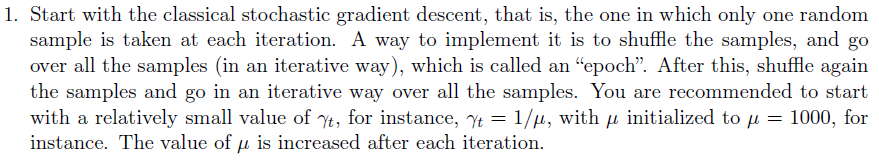

In [3]:
import numpy as np

def fun(w, b, X, y, K):
    return (1/2)*(w.T@w) + K*np.sum(np.maximum(np.zeros(y.shape), y*(X@w+b)))

In [18]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

def stochastic_gradient(X, y, K=100, n_batch=1, n_epochs=100, mi=1000, plot=False):
    mi = 1000
    initial_mi = mi 
    gamma = 1 / mi

    w_t = w = np.zeros((X.shape[1]))
    b_t = b = 0
    history = []

    batch_size = y.shape[0] / n_batch
    assert batch_size % 1 == 0
    batch_size = int(batch_size)

    for t in range(n_epochs):
        X_s, y_s = shuffle(X, y)
        mi *= 1.1
        gamma_t = 1 / mi
        for batch_idx in range(n_batch):
            X_b = X_s[batch_idx * batch_size:(batch_idx + 1) * batch_size, :]
            y_b = y_s[batch_idx * batch_size:(batch_idx + 1) * batch_size]
            for X_t, y_t in zip(X_b, y_b):
                if y_t * (X_t @ w + b) > 1:
                    w_t -= gamma_t * w
                else:
                    w_t -= gamma_t * w - (y_t * X_t)
                    b_t -= gamma_t * (-y_t)
            w = w_t
            b = b_t
        history.append(np.log(fun(w, b, X, y, K)))
    print("Achieved result: {} with mu {}".format(history[-1], initial_mi))
    if plot:
        plt.plot(history)
        if n_batch == 1:
            plt.title("Classical Stochastic Gradient for SVM")
        else:
            plt.title("Minibatch Stochastic Gradient for SVM")
        plt.ylabel("ln(f(x))")
        plt.xlabel("Iterations")
        plt.show()
    return history

Achieved result: 14.380690421528026 with mu 1000


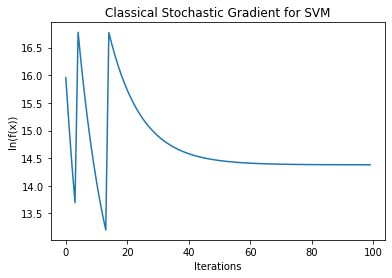

In [19]:
X, y = load_data(n_samples=1000, n_features=10)
h = stochastic_gradient(X, y, n_epochs=100, plot=True)

Achieved result: 14.490219373989229 with mu 1000
Achieved result: 14.816440126640128 with mu 1000
Achieved result: 14.889345781181946 with mu 1000
Achieved result: 14.598738528158634 with mu 1000
Achieved result: 15.192704060422733 with mu 1000


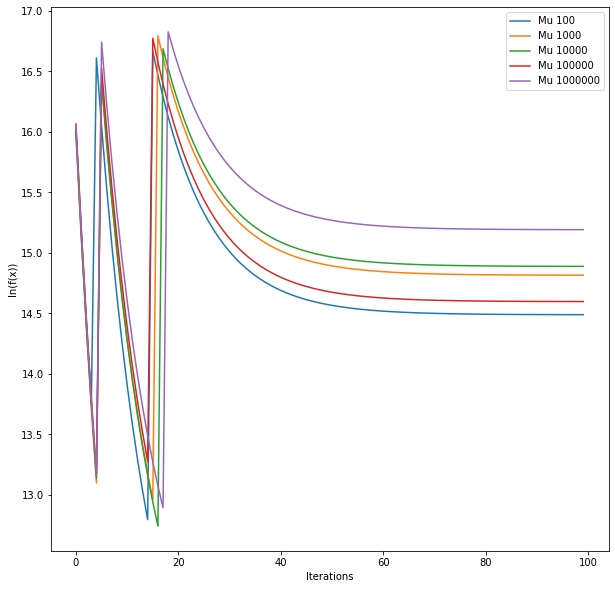

In [22]:
X, y = load_data(n_samples=1000, n_features=10)
mi_list = [ 100, 1000, 10000, 100000, 1000000]

plt.figure(figsize=(10,10))
for mi in mi_list:
    h = stochastic_gradient(X, y, n_epochs=100, mi=mi, plot=False)
    plt.plot(h, label="Mu {}".format(mi))

plt.legend()
plt.ylabel("ln(f(x))")
plt.xlabel("Iterations")
plt.show()

Multiples runs are done with different initial gamma values. During the first part of the runs, the function vary fluctuate drastically while the gama value is big. The function even reaches its best minimum value, when having these big stepsizes. When the gamma value is reduced, the function stabilizes reaching a constant minimum value.

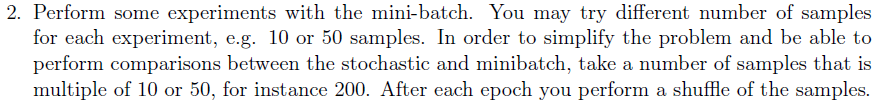

Achieved result: 14.941998063817048 with mu 1000


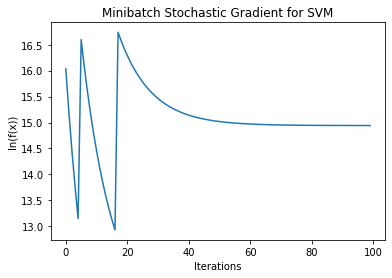

In [24]:
h = stochastic_gradient(X, y, n_batch=20, n_epochs=100, plot=True)

Achieved result: 14.834197810048346 with mu 1000
Achieved result: 14.736754282743552 with mu 1000
Achieved result: 15.291184187105271 with mu 1000
Achieved result: 15.066854010895447 with mu 1000
Achieved result: 14.709501506471621 with mu 1000


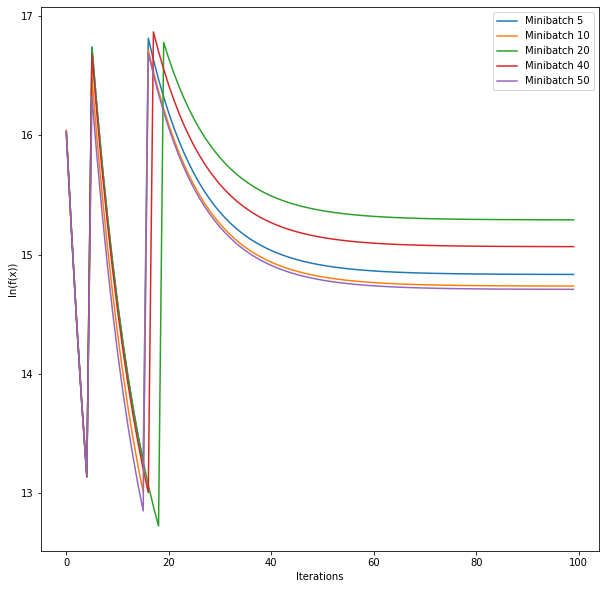

In [39]:
X, y = load_data(n_samples=1000, n_features=10)

plt.figure(figsize=(10,10))

h = stochastic_gradient(X, y, n_batch=5, n_epochs=100,mi=100000 , plot=False)
plt.plot(h, label="Minibatch {}".format(5))

h = stochastic_gradient(X, y, n_batch=10, n_epochs=100,mi=100000 , plot=False)
plt.plot(h, label="Minibatch {}".format(10))

h = stochastic_gradient(X, y, n_batch=20, n_epochs=100,mi=100000 , plot=False)
plt.plot(h, label="Minibatch {}".format(20))

h = stochastic_gradient(X, y, n_batch=40, n_epochs=100,mi=100000 , plot=False)
plt.plot(h, label="Minibatch {}".format(40))

h = stochastic_gradient(X, y, n_batch=50, n_epochs=100,mi=100000, plot=False)
plt.plot(h, label="Minibatch {}".format(50))


plt.legend()
plt.ylabel("ln(f(x))")
plt.xlabel("Iterations")
plt.show()

In this point different batch sizes are compared. The lowest value is reached by the 50 minibatch run. As the minibatch is increased, the algorithm is capable of better estimating the real gradient of the whole function because it uses more information for finding the "real" gradient. It is to say it uses more information it reduces the variability of the gradient and helps to stabilice faster the funtion.

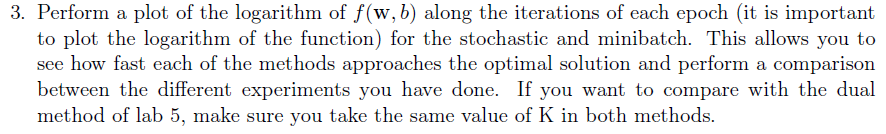

Achieved result: 15.162764897892345 with mu 1000
Achieved result: 15.302643760703925 with mu 1000
Achieved result: 15.067561024090061 with mu 1000


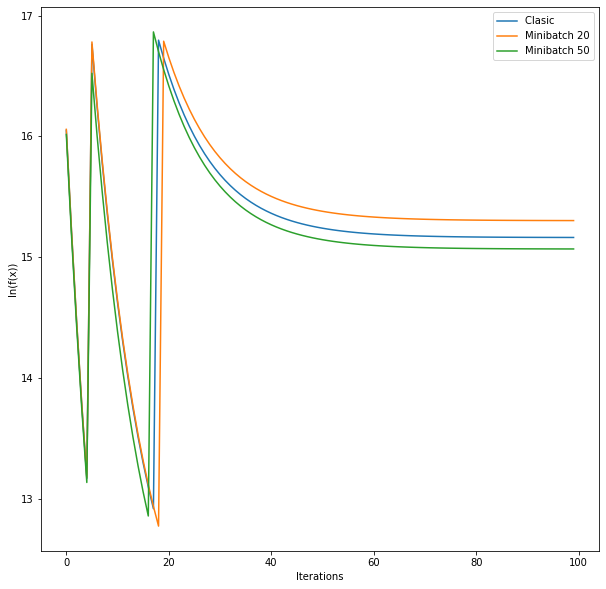

In [37]:
X, y = load_data(n_samples=1000, n_features=10)

plt.figure(figsize=(10,10))

h = stochastic_gradient(X, y, n_epochs=100, mi=100000, plot=False)
plt.plot(h, label="Clasic ")

h = stochastic_gradient(X, y, n_batch=20, n_epochs=100,mi=100000 , plot=False)
plt.plot(h, label="Minibatch {}".format(20))

h = stochastic_gradient(X, y, n_batch=50, n_epochs=100,mi=100000, plot=False)
plt.plot(h, label="Minibatch {}".format(50))


plt.legend()
plt.ylabel("ln(f(x))")
plt.xlabel("Iterations")
plt.show()

Three runs are compared, the classical stochastic gradient and two runs with 20 and 50 minimbatch. According to these runs, the 20 minibatch reaches the lowest value of the function. As it requires more information in each iteration than the classical approach, it stabbilices faster than the classical approach that only uses only one sample for descending.

x:(10, 100) Y:(100, 100) C:(100, 200) d:(200,)
Achieved result: -5020314257.59


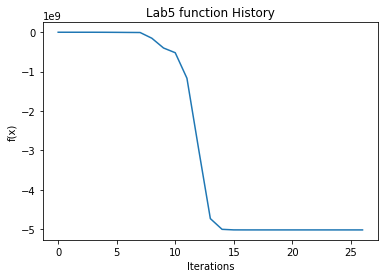

Achieved result: 13.527941226424026 with mu 1000


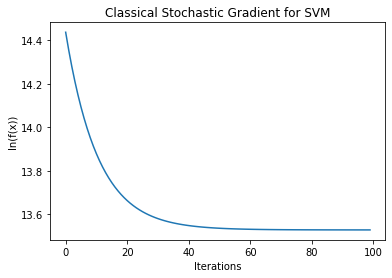

Achieved result: 13.525809385398796 with mu 1000


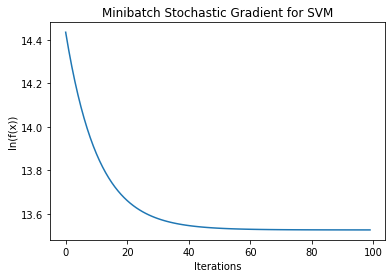

In [35]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from utilities import *


def gen_dataset(n, separable=True):
    m1 = [0. ,0.]
    s1 = [[1, -0.9],[-0.9,1]]
    c1 = np.random.multivariate_normal(m1,s1,n//2)
#    x1 = c1[:,0]
#    y1 = c1[:,1]

    if separable == True:
        m2 = [3. ,6.]
        s2 = s1
    if separable == False:
        m2 = [1. ,2.]
        s2 = [[1, 0],[0,1]]
    c2 = np.random.multivariate_normal(m2,s2,n//2)
#    x2 = c2[:,0]
#    y2 = c2[:,1]
    x = np.concatenate((c1,c2), axis=0)
    y = np.concatenate(([1]*(n//2), [-1]*(n//2)), axis=0)
    return x, y

def prob_dual_gen(x, y, K):
    def prob_dual(n):
        return prob_dual_complete(n, x, y, K)
    return prob_dual

def prob_dual_complete(n, x, y, K):

    Y = np.diag(y)

    p = 1
    m = 2*n
    N = n + p + 2*m
    #K = 100.
    A = y.reshape(n,1)
    b = np.array([0])
    G = -Y @ x.T @x @ Y
    g = np.array([1.]*n)
    C = np.concatenate((np.eye(n),-np.eye(n)), axis=0).T
    d = np.concatenate(([0.]*n, [-K]*n))
    #z = np.zeros(N)
    #z = np.array([1.]*N)
    z = np.random.rand(N)
    z[-2*m:] = 1.
    print('x:%s Y:%s C:%s d:%s' %(x.shape, Y.shape,  C.shape, d.shape))
    return z, G, A, C, g, b, d, n, m, p

def lab5(x,y,n, K, n_epochs, plot=False):
    prob_dual = prob_dual_gen(x.T, y, K)
    _, _, history =  optimization(n, prob_dual, s0, np.linalg.solve, cond_nb=False, niter=n_epochs)
    print("Achieved result: %.2f" % history[-1])
    if plot:
            plt.plot(history)
            plt.title("Lab5 function History")
            plt.ylabel("f(x)")
            plt.xlabel("Iterations")
            plt.show()

K = 100
n_epochs = 100
n_samples = 100
# X, y = gen_dataset(n=n_samples, separable=True)
X, y = load_data(n_samples=n_samples, n_features=10, random_state=1)
lab5(X, y, n=n_samples, K=K, n_epochs=n_epochs, plot=True)
h=stochastic_gradient(X, y, K, n_epochs=n_epochs, plot=True)
h=stochastic_gradient(X, y, K, n_batch=20, n_epochs=n_epochs, plot=True)
